# Imports

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import uncertainties.unumpy as unp
import uncertainties as unc

# Functions

In [3]:
def exponential(x, a, b):
    return a * np.exp(b * x)

# Data

## Total confirmed cases

In [4]:
#the following arrays report the total number of COVID-19 cases in Italy and Spain

cases_italy = [4, 21, 79, 157, 
               229, 323, 470, 665, 889, 1128, 1701, 
               2036, 2502, 3089, 3858, 4636, 5883, 7375,
               9172, 10149, 12462, 15113, 17660, 21157] #start on Feb 20st

cases_spain = [3, 9, 13, 25, 33, 58, 84, 
               120, 165, 228, 282, 401, 525, 674, 
               1231, 1695, 2277, 3146, 5232, 6391] #start on Feb 24

## Deaths

In [5]:
#total deaths from COVID-19 in Italy and Spain

deaths_italy = [1, 2, 3,
                7, 11, 12, 17, 21, 29, 41, 
                52, 79, 107, 148, 197, 233, 366,
                463, 631, 827, 1016, 1266, 1441] #start on Feb 21st

deaths_spain = [1, 2, 3, 8, 10, 17,
                30, 36, 55, 86, 133, 195] #start on Mar 3rd

# Dummy Exponential Fit: Italy vs Spain

In [1]:
n_cases_days = len(cases_italy)
x_cases_italy = np.arange(n_cases_days)

delta = len(cases_italy) - len(cases_spain)
x_cases_spain = x_cases_italy[delta:]

delta = len(cases_italy) - len(deaths_italy)
x_deaths_italy = x_cases_italy[delta:]

delta = len(cases_italy) - len(deaths_spain)
x_deaths_spain = x_cases_italy[delta:]

NameError: name 'cases_italy' is not defined

## Fit

In [7]:
#fit with a simple exponential, y_error proportional to n^0.5
popt_cases_italy, pcov_cases_italy = curve_fit(exponential, x_cases_italy, cases_italy, sigma=np.sqrt(cases_italy))
dayly_increment_cases_italy = exponential(popt_cases_italy[1],1,1) - 1
popt_cases_spain, pcov_cases_spain = curve_fit(exponential, x_cases_spain, cases_spain, sigma=np.sqrt(cases_spain))
dayly_increment_cases_spain = exponential(popt_cases_spain[1],1,1) - 1
popt_deaths_italy, pcov_deaths_italy = curve_fit(exponential, x_deaths_italy, deaths_italy, sigma=np.sqrt(deaths_italy))
dayly_increment_deaths_italy = exponential(popt_deaths_italy[1],1,1) - 1
popt_deaths_spain, pcov_deaths_spain = curve_fit(exponential, x_deaths_spain, deaths_spain, sigma=np.sqrt(deaths_spain))
dayly_increment_deaths_spain = exponential(popt_deaths_spain[1],1,1) - 1

a_cases_italy, b_cases_italy = unc.correlated_values(popt_cases_italy, pcov_cases_italy)
slope_cases_italy = unc.nominal_value(b_cases_italy)
std_slope_cases_italy = unc.std_dev(b_cases_italy)

a_cases_spain, b_cases_spain = unc.correlated_values(popt_cases_spain, pcov_cases_spain)
slope_cases_spain = unc.nominal_value(b_cases_spain)
std_slope_cases_spain = unc.std_dev(b_cases_spain)

a_deaths_italy, b_deaths_italy = unc.correlated_values(popt_deaths_italy, pcov_deaths_italy)
slope_deaths_italy = unc.nominal_value(b_deaths_italy)
std_slope_deaths_italy = unc.std_dev(b_deaths_italy)

a_deaths_spain, b_deaths_spain = unc.correlated_values(popt_deaths_spain, pcov_deaths_spain)
slope_deaths_spain = unc.nominal_value(b_deaths_spain)
std_slope_deaths_spain = unc.std_dev(b_deaths_spain)

In [8]:
params = {'axes.labelsize': 'large',
          'axes.titlesize': 'medium'}
plt.rcParams.update(params)

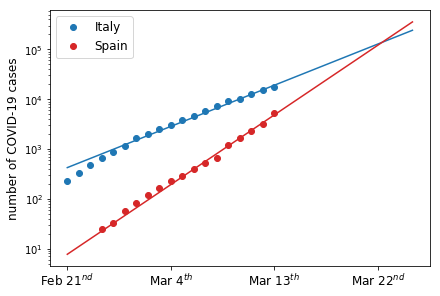

In [9]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(x_cases_italy, cases_italy, 'o', label='Italy')
ax.plot(x_cases_spain, cases_spain, 'o', color='tab:red', label='Spain')

xx = np.linspace(0, 30, 2000)
ax.plot(xx, exponential(xx, *popt_cases_italy), color='tab:blue')
ax.plot(xx, exponential(xx, *popt_cases_spain), color='tab:red')

#plot decoration
ax.set_yscale('log')
ax.set_ylabel('number of COVID-19 cases')
#ax.set_xlabel('days')
xticks = [1, 10, 19, 28]
xtickslabels = ['Feb 21$^{nd}$', 'Mar 4$^{th}$', 'Mar 13$^{th}$', 'Mar 22$^{nd}$']
ax.set_xticks(xticks)
ax.set_xticklabels(xtickslabels, fontsize='large')
ax.legend(fontsize='large')

fig.savefig('plot/COVIDcases_ItalyVsSpain.png', dpi = 300)

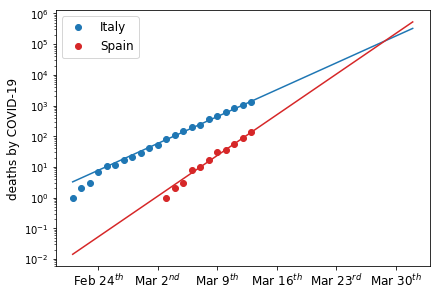

In [11]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(x_deaths_italy, deaths_italy, 'o', label='Italy')
ax.plot(x_deaths_spain, deaths_spain, 'o', color='tab:red', label='Spain')

xx = np.linspace(0, 40, 2000)
ax.plot(xx, exponential(xx, *popt_deaths_italy), color='tab:blue')
ax.plot(xx, exponential(xx, *popt_deaths_spain), color='tab:red')

#plot decoration
ax.set_yscale('log')
ax.set_ylabel('deaths by COVID-19')
#ax.set_xlabel('days')
xticks = [4, 11, 18, 25, 32, 39]
xtickslabels = ['Feb 24$^{th}$', 'Mar 2$^{nd}$', 'Mar 9$^{th}$', 'Mar 16$^{th}$', 'Mar 23$^{rd}$', 'Mar 30$^{th}$']
ax.set_xticks(xticks)
ax.set_xticklabels(xtickslabels, fontsize='large')
ax.legend(fontsize='large')

fig.savefig('plot/COVIDdeaths_ItalyVsSpain.png', dpi = 300)

## Fit Italy + Spain: cases and deaths

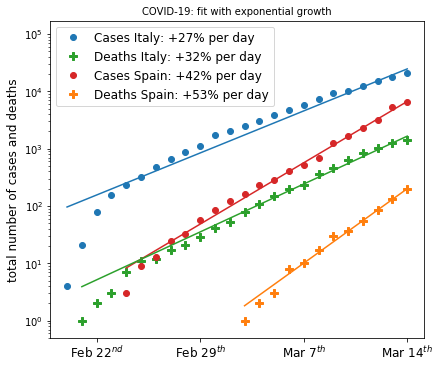

In [13]:
fig, ax = plt.subplots(figsize=(6,5), constrained_layout=True)

#label_cases_italy = 'Cases Italy: 1/slope = {} $\pm$ {} days'.format(round(slope_cases_italy,2), round(std_slope_cases_italy,2))
#label_deaths_italy = 'Deaths Italy: 1/slope = {} $\pm$ {} days'.format(round(slope_deaths_italy,2), round(std_slope_deaths_italy,2))
#label_cases_spain = 'Cases Spain: 1/slope = {} $\pm$ {} days'.format(round(slope_cases_spain,2), round(std_slope_cases_spain,2))
#label_deaths_spain = 'Deaths Spain: 1/slope = {} $\pm$ {} days'.format(round(slope_deaths_spain,2), round(std_slope_deaths_spain,2))
label_cases_italy = 'Cases Italy: +{}% per day'.format(int(round(dayly_increment_cases_italy*100)))
label_deaths_italy = 'Deaths Italy: +{}% per day'.format(int(round(dayly_increment_deaths_italy*100)))
label_cases_spain = 'Cases Spain: +{}% per day'.format(int(round(dayly_increment_cases_spain*100)))
label_deaths_spain = 'Deaths Spain: +{}% per day'.format(int(round(dayly_increment_deaths_spain*100)))
ax.plot(x_cases_italy, cases_italy, 'o', color='tab:blue', label=label_cases_italy)
ax.plot(x_deaths_italy, deaths_italy, 'P', color='tab:green', markersize=8, label=label_deaths_italy)
ax.plot(x_cases_spain, cases_spain, 'o', color='tab:red', label=label_cases_spain)
ax.plot(x_deaths_spain, deaths_spain, 'P', color='tab:orange', markersize=8, label=label_deaths_spain)

xx = np.linspace(0, 25, 2000)
ax.plot(x_cases_italy, exponential(x_cases_italy, *popt_cases_italy), color='tab:blue')
ax.plot(x_cases_spain, exponential(x_cases_spain, *popt_cases_spain), color='tab:red')
ax.plot(x_deaths_italy, exponential(x_deaths_italy, *popt_deaths_italy), color='tab:green')
ax.plot(x_deaths_spain, exponential(x_deaths_spain, *popt_deaths_spain), color='tab:orange')

#plot decoration
ax.set_yscale('log')
ax.set_ylabel('total number of cases and deaths')
#ax.set_xlabel('days')
xticks = [2, 9, 16, 23]
xtickslabels = ['Feb 22$^{nd}$', 'Feb 29$^{th}$', 'Mar 7$^{th}$', 'Mar 14$^{th}$']
ax.set_xticks(xticks)
ax.set_xticklabels(xtickslabels, fontsize='large')
ax.legend(fontsize='large', loc=2)
ax.set_ylim(0.5, 1.7e5)
ax.set_title('COVID-19: fit with exponential growth')

fig.savefig('plot/COVID_ItalyVsSpain.png', dpi = 300)

## Fit Italy: cases + deaths

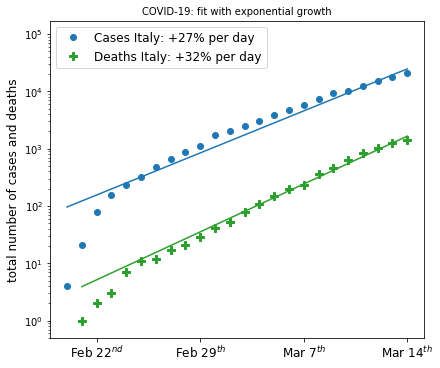

In [12]:
fig, ax = plt.subplots(figsize=(6,5), constrained_layout=True)

label_cases_italy = 'Cases Italy: +{}% per day'.format(int(round(dayly_increment_cases_italy*100)))
label_deaths_italy = 'Deaths Italy: +{}% per day'.format(int(round(dayly_increment_deaths_italy*100)))

ax.plot(x_cases_italy, cases_italy, 'o', color='tab:blue', label=label_cases_italy)
ax.plot(x_deaths_italy, deaths_italy, 'P', color='tab:green', markersize=8, label=label_deaths_italy)

ax.plot(x_cases_italy, exponential(x_cases_italy, *popt_cases_italy), color='tab:blue')
ax.plot(x_deaths_italy, exponential(x_deaths_italy, *popt_deaths_italy), color='tab:green')

#plot decoration
ax.set_yscale('log')
ax.set_ylabel('total number of cases and deaths')
#ax.set_xlabel('days')
xticks = [2, 9, 16, 23]
xtickslabels = ['Feb 22$^{nd}$', 'Feb 29$^{th}$', 'Mar 7$^{th}$', 'Mar 14$^{th}$']
ax.set_xticks(xticks)
ax.set_xticklabels(xtickslabels, fontsize='large')
ax.legend(fontsize='large', loc=2)
ax.set_ylim(0.5, 1.7e5)
ax.set_title('COVID-19: fit with exponential growth')

fig.savefig('plot/COVID_Italy.png', dpi = 300)

## Verifica stupida

In [120]:
def exp10(x, a, b):
    return a * np.exp(b * x)

In [129]:
y_test = [55, 86, 133] #start on Feb 21st
x_test = np.arange(len(y_test))

popt, pcov = curve_fit(exponential, x_test, y_test)



In [130]:
print(popt)

[55.21478426  0.43989407]


In [131]:
print(exponential(popt[1],1,1) - 1)

0.5525427479246183


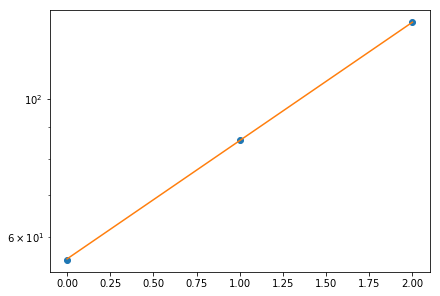

In [132]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(x_test, y_test, 'o')

ax.plot(x_test, exp10(x_test, *popt))

#plot decoration
ax.set_yscale('log')